# Model: Logistic Regression

### Import packages and modules

In [6]:
import csv
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression

### Import data

In [7]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/APassan_Portfolio/Classification_CreditCardFraud/scripts/model_prep.py

### Confirm X and Y Shapes

In [8]:
# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


### Baseline Model

First we will create a base logistic regression model

In [9]:
# Base Logistic Regression Model 
logreg_baseline = LogisticRegression(random_state=1)

#Fit
logreg_baseline.fit(X_train, Y_train)

Y_pred_logreg_baseline=logreg_baseline.predict(X_test) 

Text(33.0, 0.5, 'Truth')

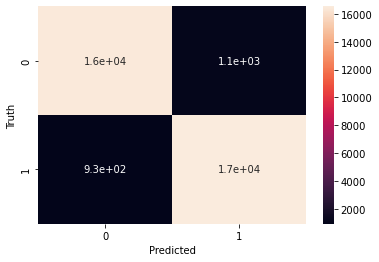

In [10]:
cm_baseline = confusion_matrix(Y_test, Y_pred_logreg_baseline)

sns.heatmap(cm_baseline, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
print(classification_report(Y_test, Y_pred_logreg_baseline))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     17489
         1.0       0.94      0.95      0.94     17473

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



### Improve the Model

Now we will implement Grid Search and K-5 cross validation to get the best logistic regression model.

In [15]:

# Find the best best penalty and C value 
param_grid = { 'penalty': ['none', 'l1', 'l2', 'elastic_net'], 'C': [0.05, 0.1, 0.5, 1, 5] }

logreg_gscv = GridSearchCV(LogisticRegression(random_state = 1), param_grid=param_grid, verbose = 2, refit = True)

logreg_gscv.fit(X_train, Y_train)

print(logreg_gscv.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...............................C=0.05, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...............................C=0.05, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...............................C=0.05, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...............................C=0.05, penalty=none; total time=   0.3s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...............................C=0.05, penalty=none; total time=   0.3s
[CV] END .................................C=0.05, penalty=l1; total time=   0.0s
[CV] END .................................C=0.05, penalty=l1; total time=   0.0s
[CV] END .................................C=0.05, penalty=l1; total time=   0.0s
[CV] END .................................C=0.05, penalty=l1; total time=   0.0s
[CV] END .................................C=0.05, penalty=l1; total time=   0.0s
[CV] END .................................C=0.05, penalty=l2; total time=   0.2s
[CV] END .................................C=0.05, penalty=l2; total time=   0.2s
[CV] END .................................C=0.05, penalty=l2; total time=   0.2s
[CV] END .................................C=0.05, penalty=l2; total time=   0.3s
[CV] END .................................C=0.05, penalty=l2; total time=   0.2s
[CV] END ........................C=0.05, penalty=elastic_net; total time=   0.0s
[CV] END ...................

/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.1, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.1, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.1, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.1, penalty=none; total time=   0.3s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.1, penalty=none; total time=   0.3s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.2s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.3s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.2s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.3s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.2s
[CV] END .........................C=0.1, penalty=elastic_net; total time=   0.0s
[CV] END ...................

/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.5, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.5, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.5, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.5, penalty=none; total time=   0.3s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................................C=0.5, penalty=none; total time=   0.3s
[CV] END ..................................C=0.5, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.2s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.2s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.3s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.3s
[CV] END ..................................C=0.5, penalty=l2; total time=   0.3s
[CV] END .........................C=0.5, penalty=elastic_net; total time=   0.0s
[CV] END ...................

/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................................C=5, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................................C=5, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................................C=5, penalty=none; total time=   0.2s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................................C=5, penalty=none; total time=   0.3s


/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..................................C=5, penalty=none; total time=   0.3s
[CV] END ....................................C=5, penalty=l1; total time=   0.0s
[CV] END ....................................C=5, penalty=l1; total time=   0.0s
[CV] END ....................................C=5, penalty=l1; total time=   0.0s
[CV] END ....................................C=5, penalty=l1; total time=   0.0s
[CV] END ....................................C=5, penalty=l1; total time=   0.0s
[CV] END ....................................C=5, penalty=l2; total time=   0.2s
[CV] END ....................................C=5, penalty=l2; total time=   0.2s
[CV] END ....................................C=5, penalty=l2; total time=   0.2s
[CV] END ....................................C=5, penalty=l2; total time=   0.2s
[CV] END ....................................C=5, penalty=l2; total time=   0.3s
[CV] END ...........................C=5, penalty=elastic_net; total time=   0.0s
[CV] END ...................

/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/line

{'C': 0.05, 'penalty': 'none'}


### Final Model

In [16]:
# Final Logistirc Regression Model
logreg_fin=LogisticRegression(C = 0.05, penalty = 'none')

logreg_fin.fit(X_train,Y_train)

Y_pred_logreg_fin=logreg_fin.predict(X_test) 

/Users/apassan/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Text(33.0, 0.5, 'Truth')

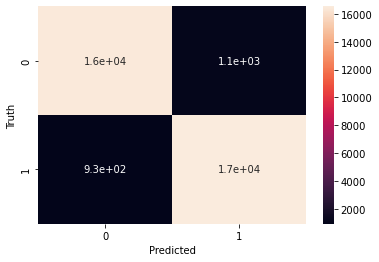

In [17]:
cm = confusion_matrix(Y_test, Y_pred_logreg_fin)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [18]:
print(classification_report(Y_test, Y_pred_logreg_fin))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     17489
         1.0       0.94      0.95      0.94     17473

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962

